<a href="https://colab.research.google.com/github/Raihan220106/Belajar-python/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv("Sentiment Dataset/Sentimentdataset.csv")

# Hapus kolom tidak penting
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], errors="ignore")

df.head()


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [42]:
df.isnull().sum()


,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0
Year,0


In [43]:
# Imputasi kolom teks
df['Text'] = df['Text'].fillna("Unknown")

# Imputasi kolom kategori
df['Sentiment'] = df['Sentiment'].fillna(df['Sentiment'].mode()[0])

# Imputasi kolom numerik
num_cols = ['Likes','Retweets','Hour','Day','Month','Year']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [44]:
df.drop_duplicates(inplace=True)
df.shape


(712, 13)

In [45]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Sentiment'] = df['Sentiment'].str.lower().str.strip()
df['Text'] = df['Text'].astype(str).str.strip()


In [46]:
df.to_csv("sentiment_cleaned.csv", index=False)


In [47]:
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode().iloc[0]
std_values = df.std(numeric_only=True)

mean_values, median_values, mode_values, std_values


(Retweets      21.542135
 Likes         42.966292
 Year        2020.476124
 Month          6.108146
 Day           15.514045
 Hour          15.592697
 dtype: float64,
 Retweets      22.0
 Likes         43.0
 Year        2021.0
 Month          6.0
 Day           15.0
 Hour          16.0
 dtype: float64,
 Text         A compassionate rain, tears of empathy falling...
 Sentiment                                             positive
 Timestamp                                  2019-04-05 17:30:00
 User                                    ArchaeologyEnthusiast 
 Platform                                            Instagram 
 Hashtags           #Acceptance #LifeJourney                   
 Retweets                                                  22.0
 Likes                                                     45.0
 Country                                                    USA
 Year                                                    2023.0
 Month                                                  

In [48]:
df.describe(include='all')


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
count,712,712,712,712,712,712,712.000000,712.000000,712,712.000000,712.000000,712.000000,712.000000
unique,706,191,NaN,685,4,697,NaN,NaN,115,NaN,NaN,NaN,NaN
top,"A compassionate rain, tears of empathy falling...",positive,NaN,WindWhisperer,Instagram,#Frustrated #MosaicOfDisappointment,NaN,NaN,USA,NaN,NaN,NaN,NaN
freq,2,45,NaN,2,252,2,NaN,NaN,59,NaN,NaN,NaN,NaN
mean,NaN,NaN,2020-12-10 05:28:32.780899072,NaN,NaN,NaN,21.542135,42.966292,NaN,2020.476124,6.108146,15.514045,15.592697
min,NaN,NaN,2010-05-15 15:30:00,NaN,NaN,NaN,5.000000,10.000000,NaN,2010.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,2019-03-02 20:20:00,NaN,NaN,NaN,17.750000,34.750000,NaN,2019.000000,3.000000,10.000000,13.000000
50%,NaN,NaN,2021-10-16 16:37:30,NaN,NaN,NaN,22.000000,43.000000,NaN,2021.000000,6.000000,15.000000,16.000000
75%,NaN,NaN,2023-02-27 15:26:15,NaN,NaN,NaN,25.000000,50.000000,NaN,2023.000000,9.000000,22.000000,19.000000
max,NaN,NaN,2023-10-22 20:45:00,NaN,NaN,NaN,40.000000,80.000000,NaN,2023.000000,12.000000,31.000000,23.000000


In [49]:
numeric_cols = ['Likes','Retweets','Hour']

for col in numeric_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std = df[col].std()

    print(f"== {col} ==")
    print(f"Mean   : {mean}")
    print(f"Median : {median}")
    print(f"Mode   : {mode}")
    print(f"Std    : {std}")
    print("---------------------------")


== Likes ==
Mean   : 42.96629213483146
Median : 43.0
Mode   : 45.0
Std    : 14.215994587981081
---------------------------
== Retweets ==
Mean   : 21.542134831460675
Median : 22.0
Mode   : 22.0
Std    : 7.124839767246677
---------------------------
== Hour ==
Mean   : 15.592696629213483
Median : 16.0
Mode   : 14
Std    : 4.062777766762325
---------------------------


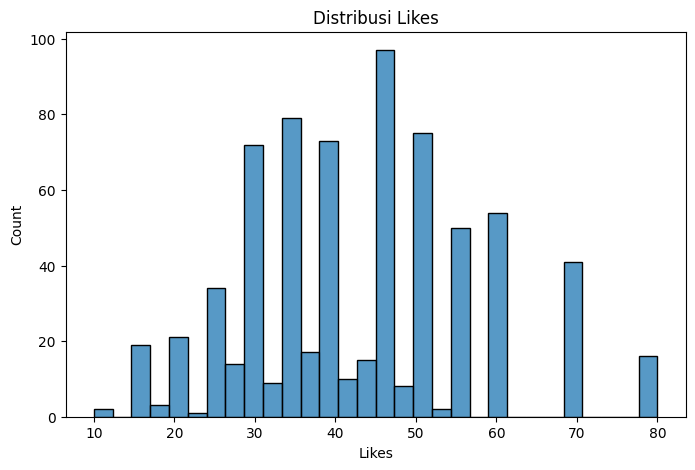

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Likes'], bins=30)
plt.title("Distribusi Likes")
plt.show()


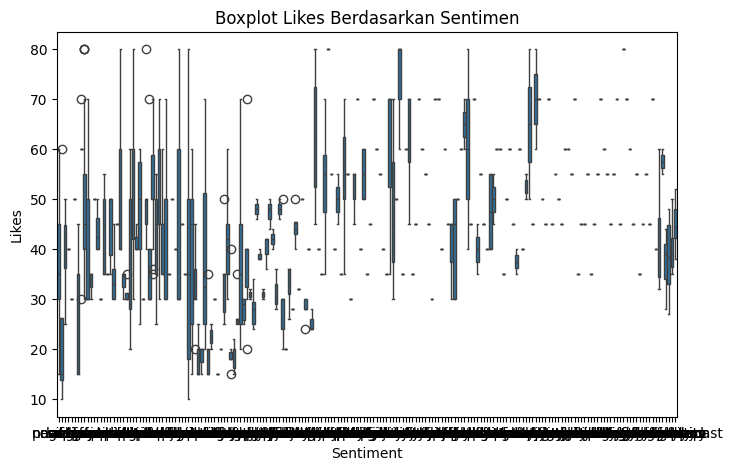

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Sentiment", y="Likes")
plt.title("Boxplot Likes Berdasarkan Sentimen")
plt.show()


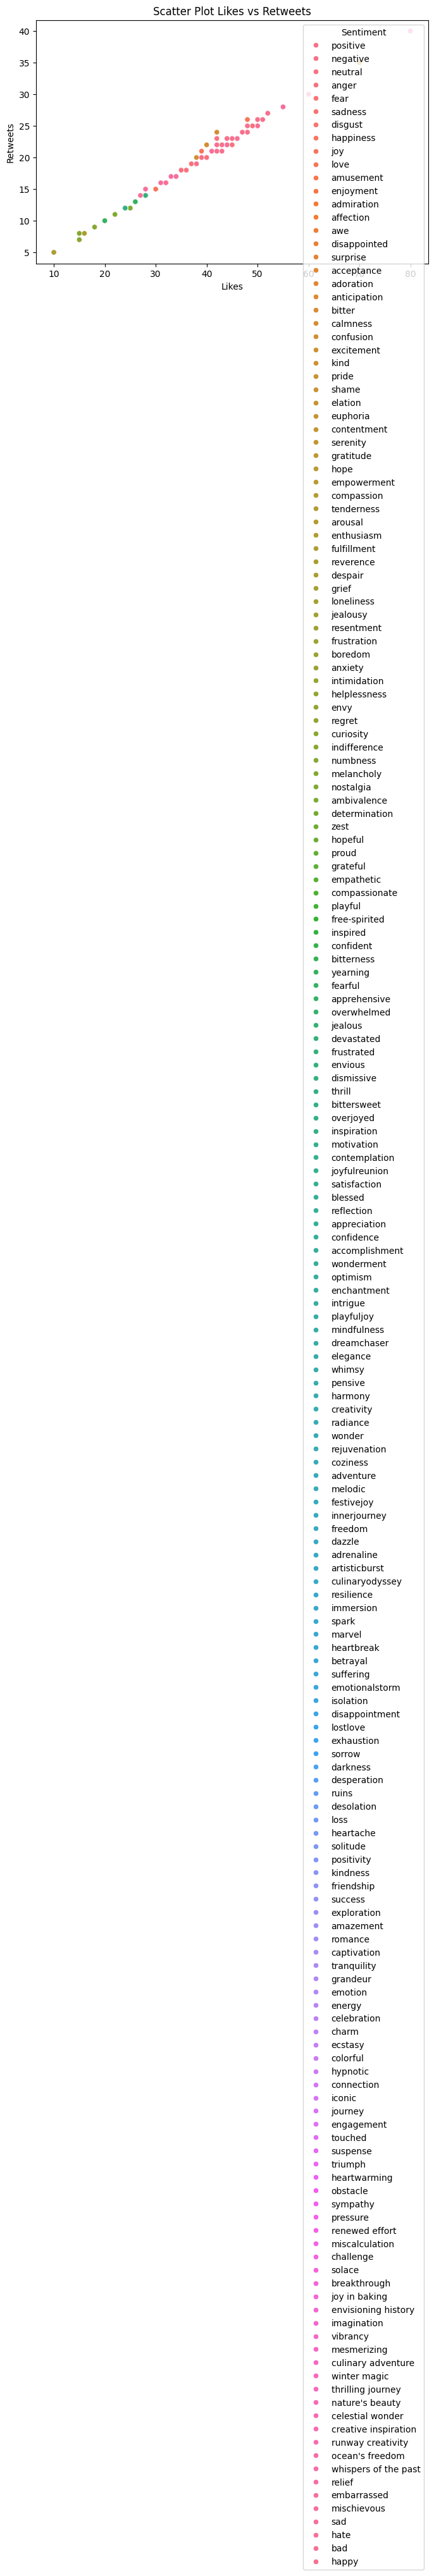

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Likes", y="Retweets", hue="Sentiment")
plt.title("Scatter Plot Likes vs Retweets")
plt.show()


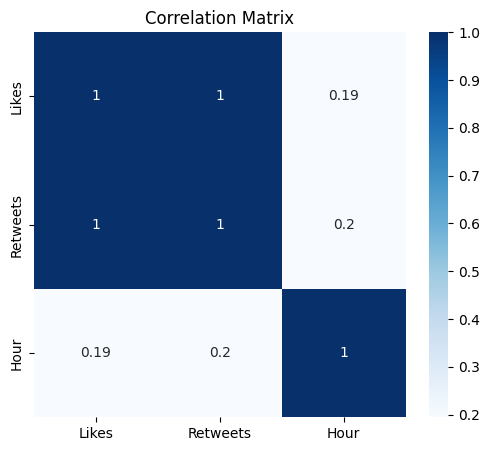

In [53]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Likes','Retweets','Hour']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()


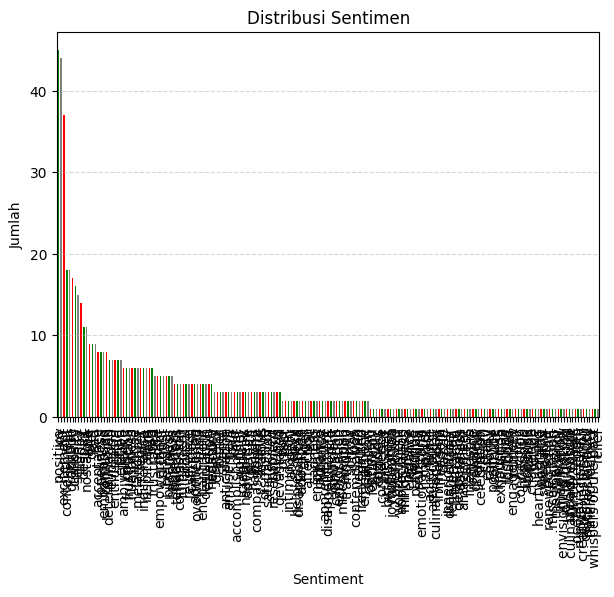

In [54]:
plt.figure(figsize=(7,5))
df['Sentiment'].value_counts().plot(kind='bar', color=['green','gray','red'])

plt.title("Distribusi Sentimen")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("barplot_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()


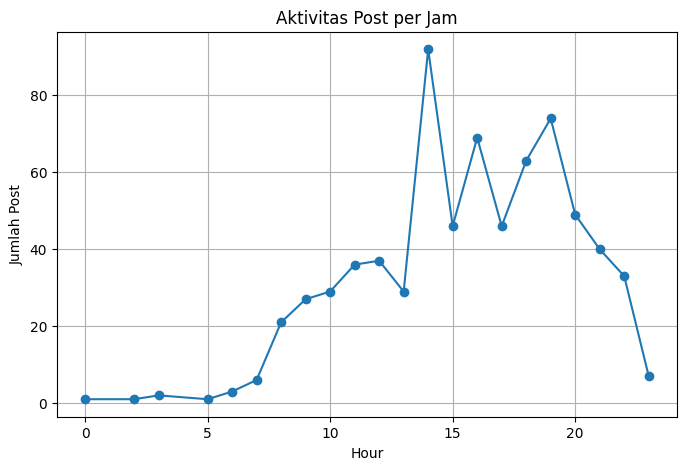

In [55]:
activity = df.groupby("Hour")['Text'].count()

plt.figure(figsize=(8,5))
plt.plot(activity.index, activity.values, marker='o')

plt.title("Aktivitas Post per Jam")
plt.xlabel("Hour")
plt.ylabel("Jumlah Post")
plt.grid(True)

plt.savefig("lineplot_activity_hour.png", dpi=300, bbox_inches='tight')
plt.show()


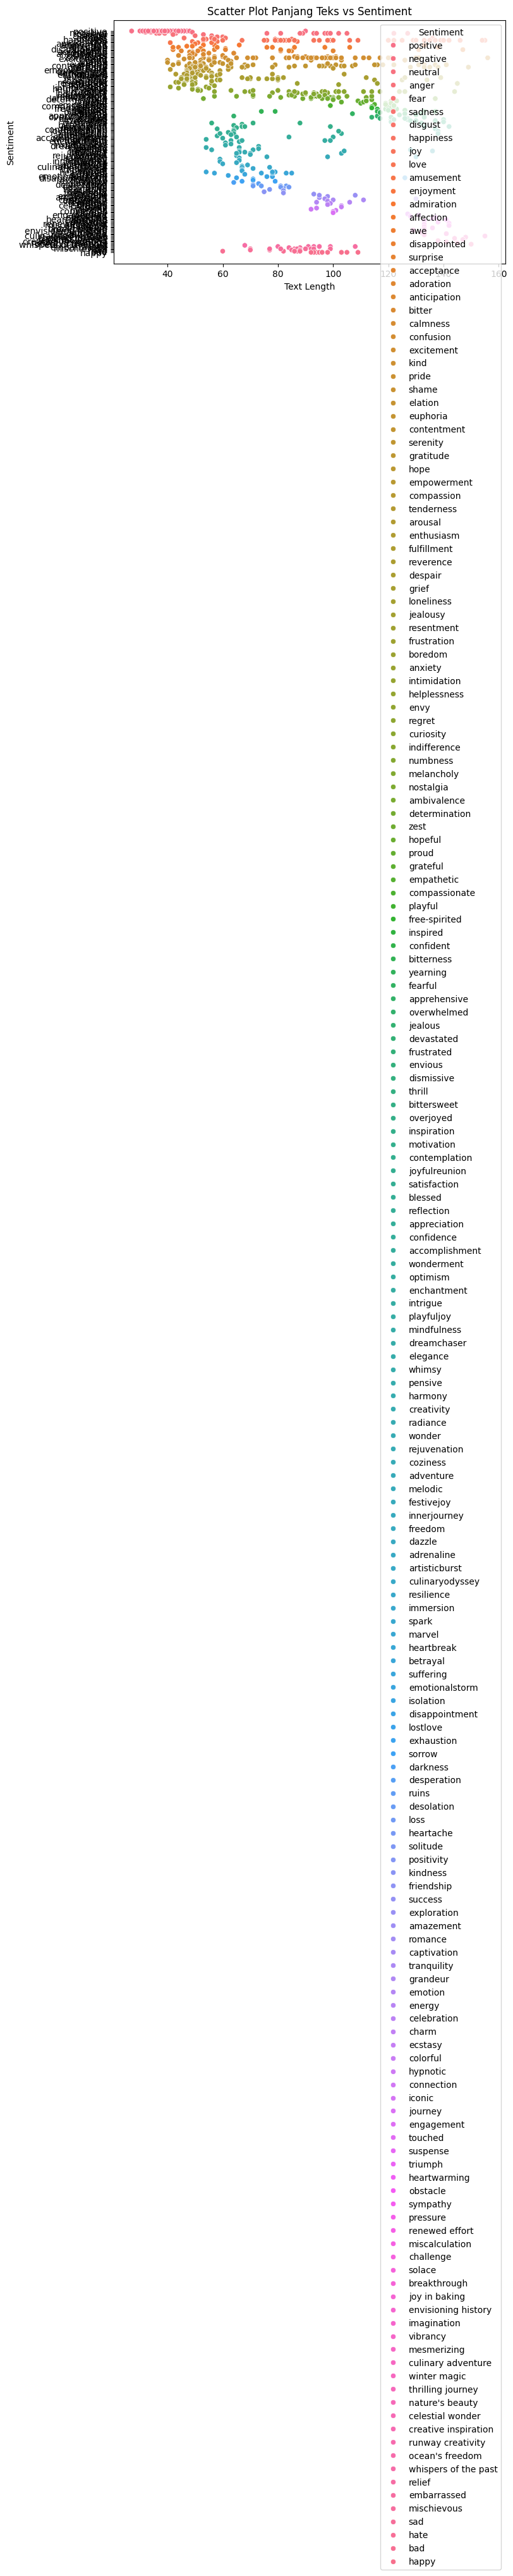

In [56]:
df['text_length'] = df['Text'].apply(len)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="text_length", y="Sentiment", hue="Sentiment")

plt.title("Scatter Plot Panjang Teks vs Sentiment")
plt.xlabel("Text Length")
plt.ylabel("Sentiment")

plt.savefig("scatter_textlength_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()


In [57]:
#Pada Level 1, telah dilakukan tiga tugas utama:

### 🔹 TASK 1: Cleaning & Preprocessing
#- Menghapus missing values
#- Menghapus duplikat
#- Standardisasi format Timestamp
#- Normalisasi kolom text & sentiment

### 🔹 TASK 2: Exploratory Data Analysis
#- Statistik ringkasan (mean, median, mode, std)
#- Histogram distribusi Likes
#- Boxplot berdasarkan Sentiment
#- Scatter plot Likes vs Retweets
#- Korelasi antar fitur numerik

### 🔹 TASK 3: Basic Visualization
#- Bar plot: Distribusi Sentimen
#- Line plot: Aktivitas per jam
#- Scatter plot: Panjang teks vs Sentimen

#Hasil visualisasi telah diekspor sebagai file PNG untuk laporan.


R-squared: 0.9954241661235723
MSE: 0.8126299663693161
Koefisien (slope): 1.991495602077081
Intercept: 0.08280203572456202


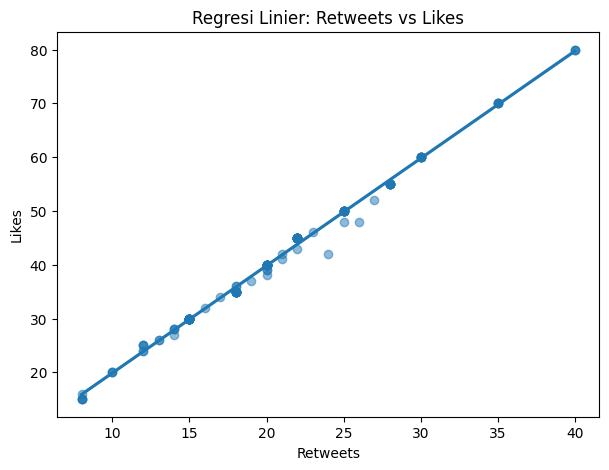

In [58]:
# ==========================
# LEVEL 2 — TASK 1: REGRESI LINIER
# ==========================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset sentiment
df = pd.read_csv("sentiment_cleaned.csv")

# 2. Pilih variabel numerik untuk regresi
X = df[['Retweets']]
y = df['Likes']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Buat model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Prediksi
y_pred = model.predict(X_test)

# 6. Evaluasi model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("MSE:", mse)
print("Koefisien (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

# 7. Visualisasi regresi
plt.figure(figsize=(7,5))
sns.regplot(x=X_test['Retweets'], y=y_test, scatter_kws={'alpha':0.5})
plt.title("Regresi Linier: Retweets vs Likes")
plt.xlabel("Retweets")
plt.ylabel("Likes")
plt.show()


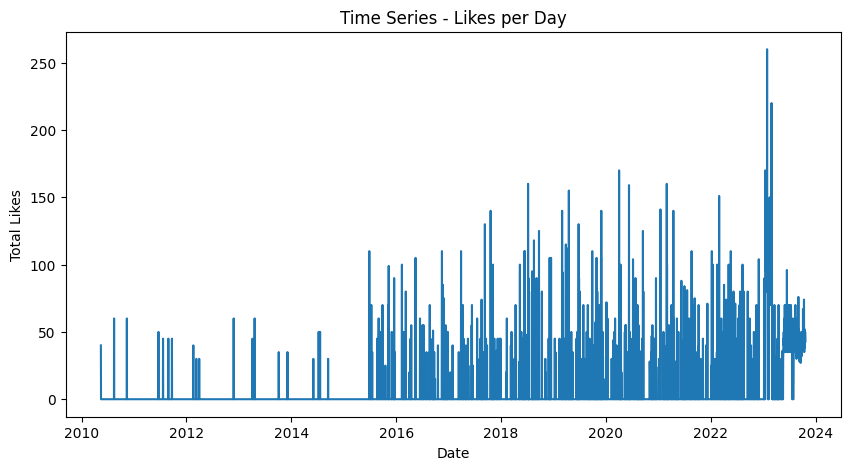

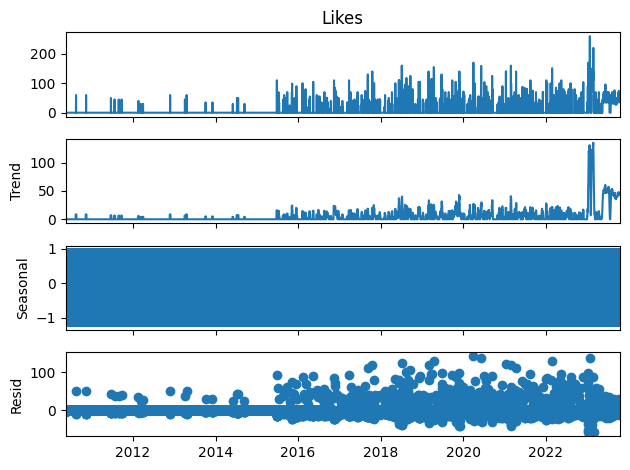

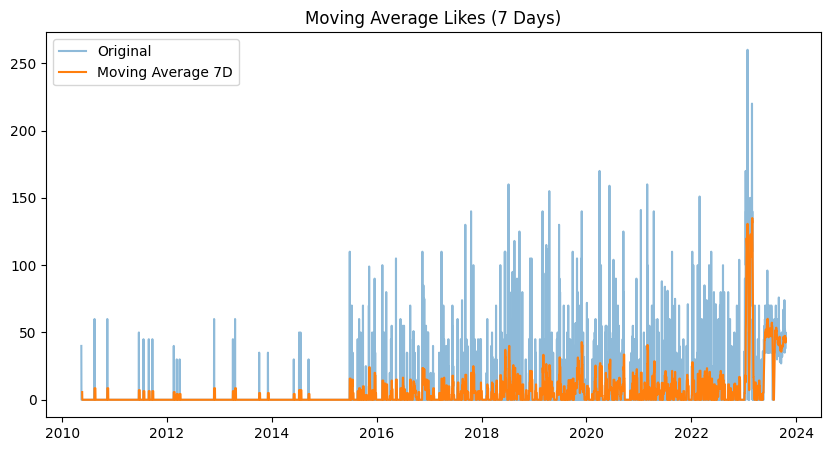

In [59]:
# ==========================
# LEVEL 2 — TASK 2: TIME SERIES ANALYSIS
# ==========================

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv("sentiment_cleaned.csv")

# Pastikan Timestamp dalam datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp sebagai index
dfTS = df.set_index('Timestamp')

# Pilih kolom yang masuk akal untuk time series (misalnya Likes per hari)
ts = dfTS['Likes'].resample('D').sum()

# Plot time series
plt.figure(figsize=(10,5))
plt.plot(ts)
plt.title("Time Series - Likes per Day")
plt.xlabel("Date")
plt.ylabel("Total Likes")
plt.show()

# Decomposition (trend, seasonal, residu)
result = seasonal_decompose(ts, model='additive', period=7)
result.plot()
plt.show()

# Moving Average (7 hari)
ts_ma = ts.rolling(window=7).mean()

plt.figure(figsize=(10,5))
plt.plot(ts, alpha=0.5, label="Original")
plt.plot(ts_ma, label="Moving Average 7D")
plt.legend()
plt.title("Moving Average Likes (7 Days)")
plt.show()


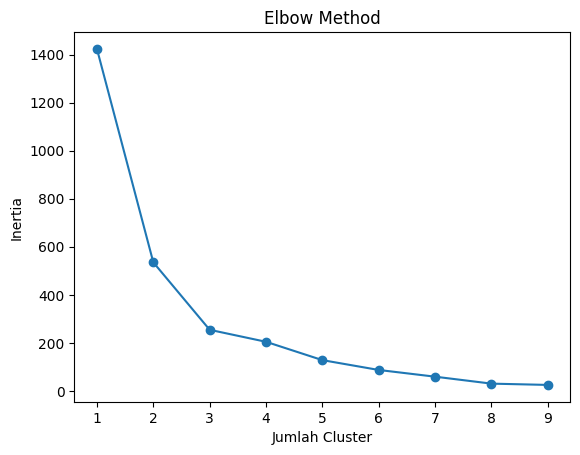

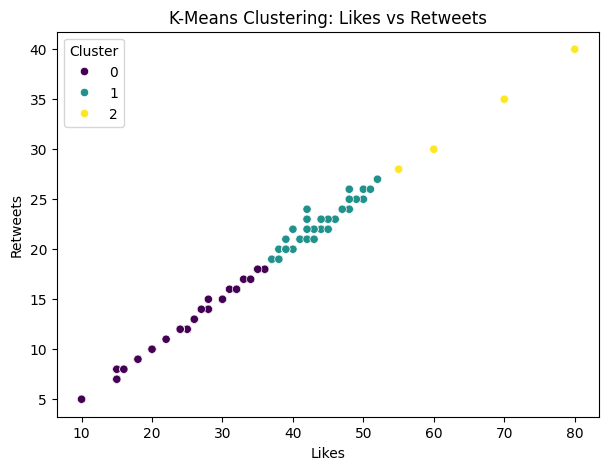

In [63]:
# ==========================
# LEVEL 2 — TASK 3: K-MEANS CLUSTERING
# ==========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("sentiment_cleaned.csv")

# Ambil fitur numerik
data = df[['Likes', 'Retweets']].fillna(0)

# Standarisasi
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

# Tentukan jumlah cluster optimal (Elbow Method)
inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.show()

# Misal pilih 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

df['Cluster'] = clusters

# Visualisasi cluster 2D
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Likes', y='Retweets', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering: Likes vs Retweets")
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



TRAINING MODELS (NUMERIC+CAT)
LogisticRegression trained.
DecisionTree trained.
RandomForest trained.

MODEL EVALUATION

=== LogisticRegression ===
                      precision    recall  f1-score   support

          acceptance       1.00      0.33      0.50         3
      accomplishment       0.00      0.00      0.00         1
          admiration       0.00      0.00      0.00         0
           adoration       0.00      0.00      0.00         0
          adrenaline       0.00      0.00      0.00         1
           adventure       0.00      0.00      0.00         0
           affection       0.50      1.00      0.67         1
           amazement       0.00      0.00      0.00         0
         ambivalence       0.00      0.00      0.00         0
           amusement       0.00      0.00      0.00         1
               anger       1.00      1.00      1.00         1
        anticipation       0.00      0.00      0.00         0
             anxiety       0.00      0.00   

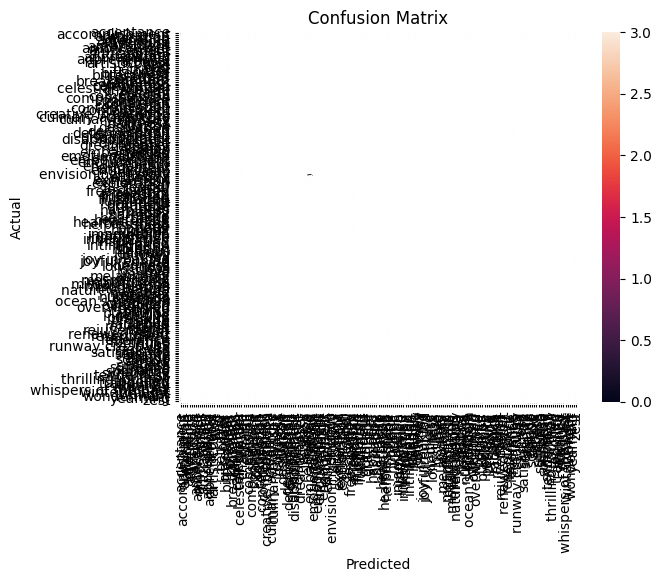


=== DecisionTree ===
                      precision    recall  f1-score   support

          acceptance       0.00      0.00      0.00         3
      accomplishment       0.00      0.00      0.00         1
          admiration       0.00      0.00      0.00         0
           adoration       0.00      0.00      0.00         0
          adrenaline       0.00      0.00      0.00         1
           adventure       0.00      0.00      0.00         0
           affection       0.50      1.00      0.67         1
           amazement       0.00      0.00      0.00         0
         ambivalence       0.00      0.00      0.00         0
           amusement       0.00      0.00      0.00         1
               anger       1.00      1.00      1.00         1
        anticipation       0.00      0.00      0.00         0
             anxiety       0.00      0.00      0.00         0
        appreciation       0.00      0.00      0.00         0
        apprehensive       0.00      0.00      

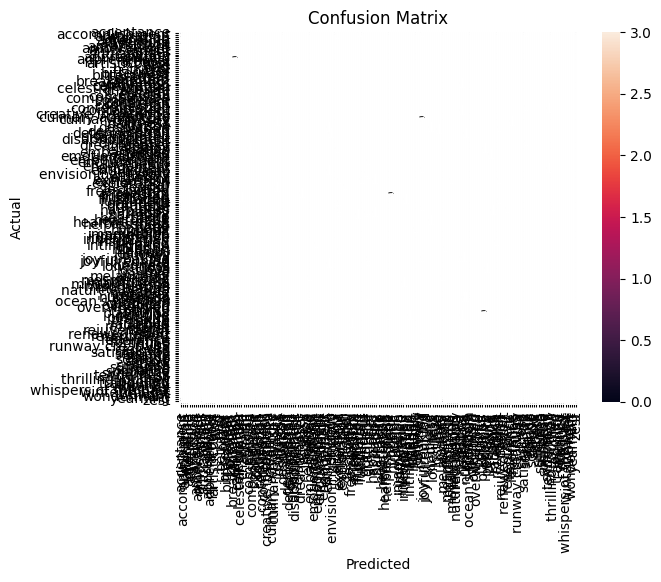


=== RandomForest ===
                      precision    recall  f1-score   support

          acceptance       0.50      0.67      0.57         3
      accomplishment       0.00      0.00      0.00         1
          admiration       0.00      0.00      0.00         0
           adoration       0.00      0.00      0.00         0
          adrenaline       0.00      0.00      0.00         1
           adventure       0.00      0.00      0.00         0
           affection       1.00      1.00      1.00         1
           amazement       0.00      0.00      0.00         0
         ambivalence       0.00      0.00      0.00         0
           amusement       0.00      0.00      0.00         1
               anger       1.00      1.00      1.00         1
        anticipation       0.00      0.00      0.00         0
             anxiety       0.00      0.00      0.00         0
        appreciation       0.00      0.00      0.00         0
        apprehensive       0.00      0.00      

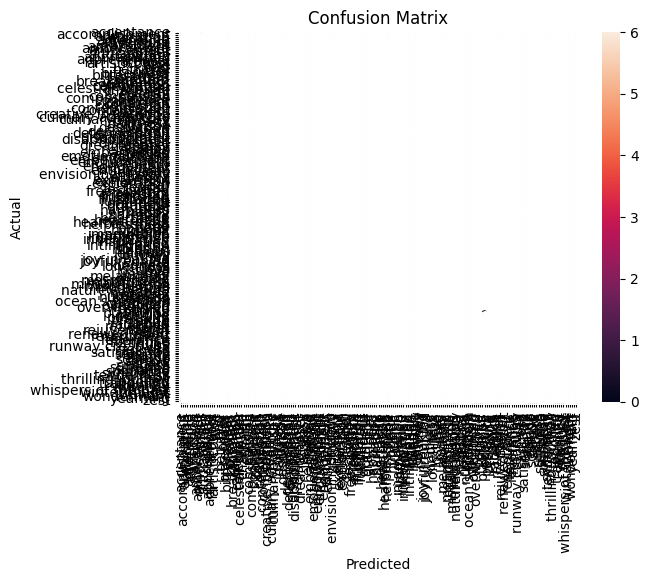


GRID SEARCH — RANDOM FOREST


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Params: {'clf__max_depth': None, 'clf__n_estimators': 200}

=== Best RandomForest Model Evaluation ===
                      precision    recall  f1-score   support

          acceptance       0.33      0.33      0.33         3
      accomplishment       0.00      0.00      0.00         1
          admiration       0.00      0.00      0.00         0
           adoration       0.00      0.00      0.00         0
          adrenaline       0.00      0.00      0.00         1
           adventure       0.00      0.00      0.00         0
           affection       1.00      1.00      1.00         1
           amazement       0.00      0.00      0.00         0
         ambivalence       0.00      0.00      0.00         0
           amusement       0.00      0.00      0.00         1
               anger       1.00      1.00      1.00         1
        anticipation       0.00      0.00      0.00         0
             anxiety       0.00      0.00      0.00         0
        appreciation   

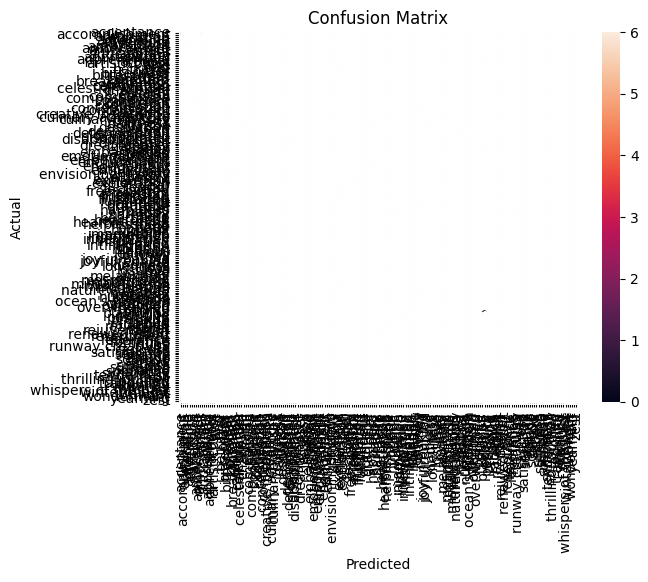

In [61]:
# ============================================
# LEVEL 3 — ADVANCED (FULL CODE, SINGLE BLOCK)
# Classification + NLP Sentiment Analysis
# Dataset: Sentiment Dataset
# ============================================

!pip install scikit-learn nltk textblob wordcloud imbalanced-learn tqdm --quiet

# -----------------------------
# IMPORT LIBRARIES
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk, re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob

from wordcloud import WordCloud
nltk.download('punkt'); nltk.download('stopwords'); nltk.download('wordnet'); nltk.download('omw-1.4')

# ============================================
# LOAD DATASET
# ============================================
df = pd.read_csv("sentiment_cleaned.csv")

df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], errors="ignore")
df['Sentiment'] = df['Sentiment'].astype(str).str.lower().str.strip()

# Create text_length
df['text_length'] = df['Text'].astype(str).apply(len)

# ============================================
# LEVEL 3 — TASK 1: CLASSIFICATION
# ============================================

num_features = ['Likes', 'Retweets', 'text_length', 'Hour']
cat_features = ['Platform', 'Country']

# Fill NA
df[num_features] = df[num_features].fillna(0)
df[cat_features] = df[cat_features].fillna('unknown')

X = df[num_features + cat_features]
y = df['Sentiment']

le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42
)

# Preprocessing Pipeline
from sklearn.impute import SimpleImputer

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced'),
    'RandomForest': RandomForestClassifier(n_estimators=100, class_weight='balanced')
}

print("\n==============================")
print("TRAINING MODELS (NUMERIC+CAT)")
print("==============================")

trained_models = {}
for name, model in models.items():
    pipe = Pipeline([('prep', preprocessor), ('clf', model)])
    pipe.fit(X_train, y_train)
    trained_models[name] = pipe
    print(f"{name} trained.")

# Evaluation Function
def evaluate(model, x, y, encoder):
    yp = model.predict(x)
    # Ensure classification_report and confusion_matrix consider all possible labels
    print(classification_report(y, yp, labels=np.arange(len(encoder.classes_)), target_names=encoder.classes_, zero_division=0))
    cm = confusion_matrix(y, yp, labels=np.arange(len(encoder.classes_)))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

print("\n==============================")
print("MODEL EVALUATION")
print("==============================")

for name, model in trained_models.items():
    print(f"\n=== {name} ===")
    evaluate(model, X_test, y_test, le)

# Hyperparameter Tuning (Random Forest)
print("\n==============================")
print("GRID SEARCH — RANDOM FOREST")
print("==============================")

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10],
}

rf_pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced'))
])

grid = GridSearchCV(rf_pipe, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
best_rf = grid.best_estimator_

print("\n=== Best RandomForest Model Evaluation ===")
evaluate(best_rf, X_test, y_test, le)


NLP SENTIMENT ANALYSIS


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



=== NLP MODEL: LogisticRegression ===
                precision    recall  f1-score   support

    acceptance       1.00      1.00      1.00         2
accomplishment       0.00      0.00      0.00         1
    admiration       0.00      0.00      0.00         1
     adoration       0.00      0.00      0.00         0
     adventure       0.00      0.00      0.00         1
     affection       0.00      0.00      0.00         0
   ambivalence       1.00      1.00      1.00         1
     amusement       0.00      0.00      0.00         1
         anger       0.00      0.00      0.00         0
  anticipation       0.00      0.00      0.00         1
       anxiety       0.00      0.00      0.00         0
  apprehensive       0.00      0.00      0.00         0
       arousal       0.00      0.00      0.00         1
           awe       1.00      0.50      0.67         2
           bad       0.00      0.00      0.00         1
      betrayal       0.00      0.00      0.00         1
        

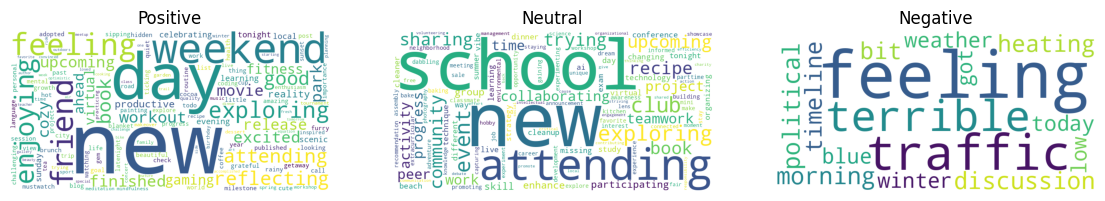


Top words per sentiment:

 POSITIVE : [('new', 10), ('day', 5), ('weekend', 4), ('feeling', 4), ('friend', 4), ('enjoying', 3), ('exploring', 3), ('reflecting', 3), ('good', 3), ('book', 3), ('attending', 3), ('park', 2), ('finished', 2), ('workout', 2), ('excited', 2)]

 NEUTRAL : [('new', 6), ('school', 5), ('attending', 4), ('exploring', 3), ('event', 3), ('club', 3), ('trying', 2), ('recipe', 2), ('upcoming', 2), ('community', 2), ('sharing', 2), ('book', 2), ('collaborating', 2), ('project', 2), ('peer', 2)]

 NEGATIVE : [('feeling', 2), ('traffic', 1), ('terrible', 1), ('morning', 1), ('political', 1), ('discussion', 1), ('heating', 1), ('timeline', 1), ('bit', 1), ('weather', 1), ('today', 1), ('winter', 1), ('blue', 1), ('got', 1), ('low', 1)]


In [62]:
# ============================================
# LEVEL 3 — TASK 3: NLP SENTIMENT ANALYSIS
# ============================================

print("\n==============================")
print("NLP SENTIMENT ANALYSIS")
print("==============================")

nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

df['text_clean'] = df['Text'].astype(str).apply(clean_text)

# Filter out empty sentiment strings and sentiment classes with only one sample
# Ensure sentiments are strings before value_counts
df['Sentiment'] = df['Sentiment'].astype(str)
df_temp = df[df['Sentiment'] != ''].copy() # Filter out empty strings first

sentiment_counts = df_temp['Sentiment'].value_counts()
rara_sentiments = sentiment_counts[sentiment_counts < 2].index.tolist() # Ensure it's a list for clarity

df_filtered = df_temp[~df_temp['Sentiment'].isin(rara_sentiments)].copy()

# Critical checks: ensure that after filtering, no sentiment has less than 2 samples
if df_filtered['Sentiment'].empty:
    raise ValueError("Filtered DataFrame for NLP is empty.")
min_count_after_filter = df_filtered['Sentiment'].value_counts().min()
if min_count_after_filter < 2:
    raise ValueError(f"After filtering, some sentiment classes still have less than 2 samples. Minimum count is {min_count_after_filter}")

tfidf = TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1,2))
# Apply TF-IDF only to the filtered text
X_text = tfidf.fit_transform(df_filtered['text_clean'])

# Use a new LabelEncoder for the NLP task to correctly encode the *filtered* sentiments
le_nlp = LabelEncoder()
y_text = le_nlp.fit_transform(df_filtered['Sentiment'])

# Final check for y_text after encoding
if len(y_text) == 0:
    raise ValueError("Encoded target y_text is empty.")
y_text_class_counts = np.bincount(y_text)
if y_text_class_counts.min() < 2:
    raise ValueError(f"After encoding, y_text still contains classes with less than 2 samples. Minimum count is {y_text_class_counts.min()}")

# Now proceed with train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42, stratify=y_text
)

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

text_models = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "NaiveBayes": MultinomialNB(),
    "LinearSVC": LinearSVC()
}

for name, model in text_models.items():
    model.fit(X_tr, y_tr)
    pred = model.predict(X_te)
    print(f"\n=== NLP MODEL: {name} ===")
    # Use le_nlp.classes_ for target_names, and zero_division=0 to handle potential missing classes in test set
    print(classification_report(y_te, pred, labels=np.arange(len(le_nlp.classes_)), target_names=le_nlp.classes_, zero_division=0))

# WordClouds
print("\n==============================")
print("WORDCLOUD GENERATION")
print("==============================")

wc = WordCloud(width=800, height=400, background_color='white')

plt.figure(figsize=(14,6))
sentiments_to_plot = ['positive', 'neutral', 'negative']
for i, s in enumerate(sentiments_to_plot, 1):
    # Ensure we plot only for sentiments present in the filtered data
    if s in df_filtered['Sentiment'].unique():
        text = " ".join(df_filtered[df_filtered['Sentiment'] == s]['text_clean'])
        plt.subplot(1,3,i)
        plt.imshow(wc.generate(text))
        plt.title(s.capitalize()); plt.axis("off")
    else:
        plt.subplot(1,3,i)
        plt.title(f"{s.capitalize()} (No data in filtered set)"); plt.axis("off")

plt.show()

# Top words (frequency)
from collections import Counter

def top_words(sent):
    # Ensure we get top words only for sentiments present in the filtered data
    if sent in df_filtered['Sentiment'].unique():
        words = " ".join(df_filtered[df_filtered['Sentiment']==sent]['text_clean']).split()
        return Counter(words).most_common(15)
    return []

print("\nTop words per sentiment:")
for s in sentiments_to_plot:
    print("\n", s.upper(), ":", top_words(s))